# Unsupervised Learning: DBSCAN

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is fundamentally different from K-Means.

- **K-Means:** Groups points based on distance to a center (Assumes clusters are round/spherical).
- **DBSCAN:** Groups points based on **Density** (Assumes clusters are dense regions separated by empty space).

### Why do we need it?
Because real-world data isn't always round. Sometimes it's shaped like a crescent, a ring, or a snake.

## The "Moon" Problem
Let's generate a dataset that breaks K-Means.

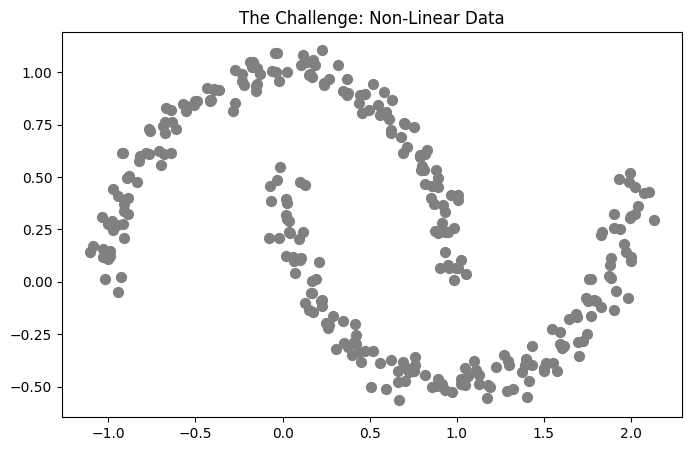

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN

# Generate 2 Interlocking Half-Moons
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=50, color='gray')
plt.title("The Challenge: Non-Linear Data")
plt.show()

## K-Means Fails
K-Means tries to find a center for each moon, but because it relies on straight-line distance, it cuts right through the middle.

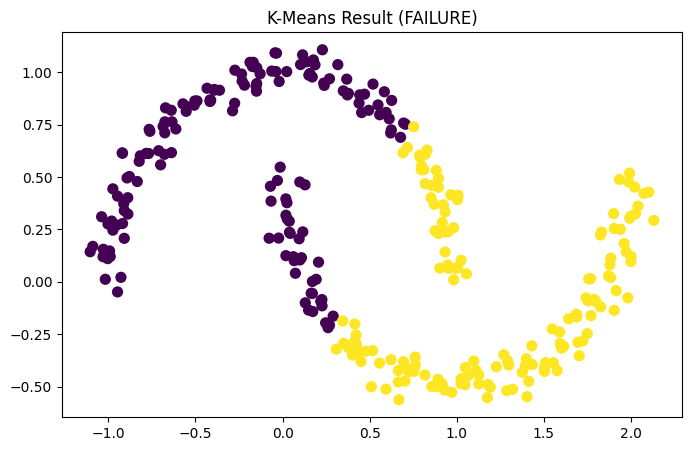

In [2]:
# Train K-Means (K=2)
kmeans = KMeans(n_clusters=2, random_state=42)
y_km = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_km, cmap='viridis', s=50)
plt.title("K-Means Result (FAILURE)")
plt.show()

### Analysis
See that? It drew a straight line. It classified the top half of the left moon with the top half of the right moon. **Totally wrong.**

# DBSCAN

DBSCAN has two parameters:
1.  **eps (Epsilon):** The maximum distance between two samples for one to be considered as in the neighborhood of the other.
2.  **min_samples:** The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

It "crawls" along the density.

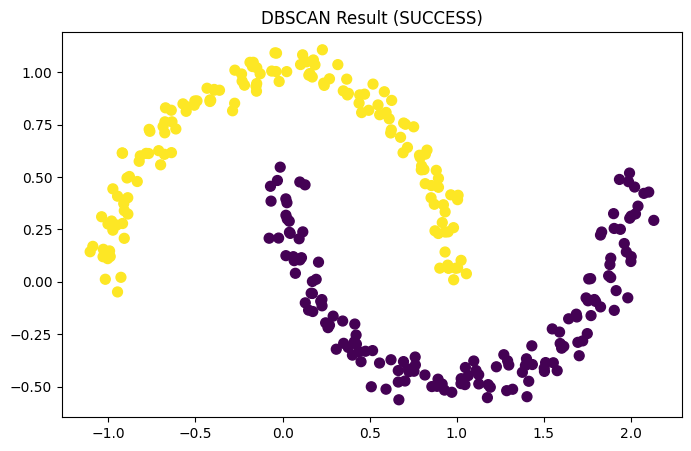

In [3]:
# Train DBSCAN
# eps=0.2 means "look for neighbors within 0.2 distance"
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_db = dbscan.fit_predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_db, cmap='viridis', s=50)
plt.title("DBSCAN Result (SUCCESS)")
plt.show()

### Conclusion
Perfect separation! 

**Note on Noise:** If you see any purple dots (Category -1), that's DBSCAN saying "This point is too far away, it's noise." K-Means would have forced it into a cluster.

# Real World Example: Spatial Clustering (California Housing)

DBSCAN is excellent for **Geospatial Data** because cities are basically "dense clusters of people" separated by empty space.

**The Dataset:** California Housing Prices.
**The Goal:** Cluster districts based on location (**Latitude & Longitude**) to find natural geographic regions.

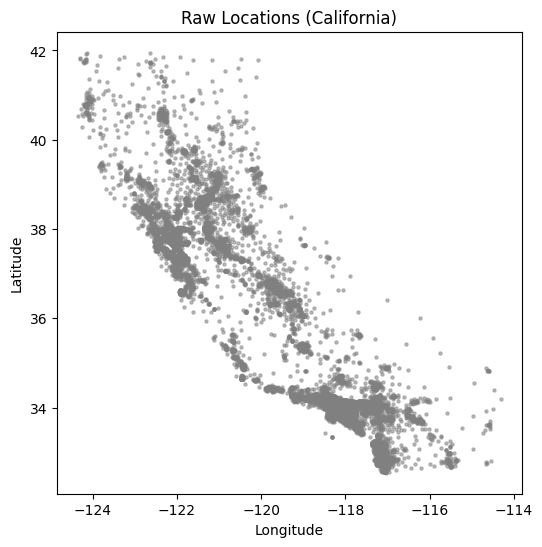

In [9]:
from sklearn.datasets import fetch_california_housing

# 1. Load Data
calif = fetch_california_housing(as_frame=True)
X_loc = calif.frame[['Longitude', 'Latitude']]

plt.figure(figsize=(6, 6))
plt.scatter(X_loc['Longitude'], X_loc['Latitude'], s=5, alpha=0.5, color='gray')
plt.title("Raw Locations (California)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Tuning DBSCAN for Geography
For Lat/Long, `eps` implies degrees. 
- $1^\circ \approx 111$ km.
- Let's choose `eps=0.3` (~33km) to define a "Region".

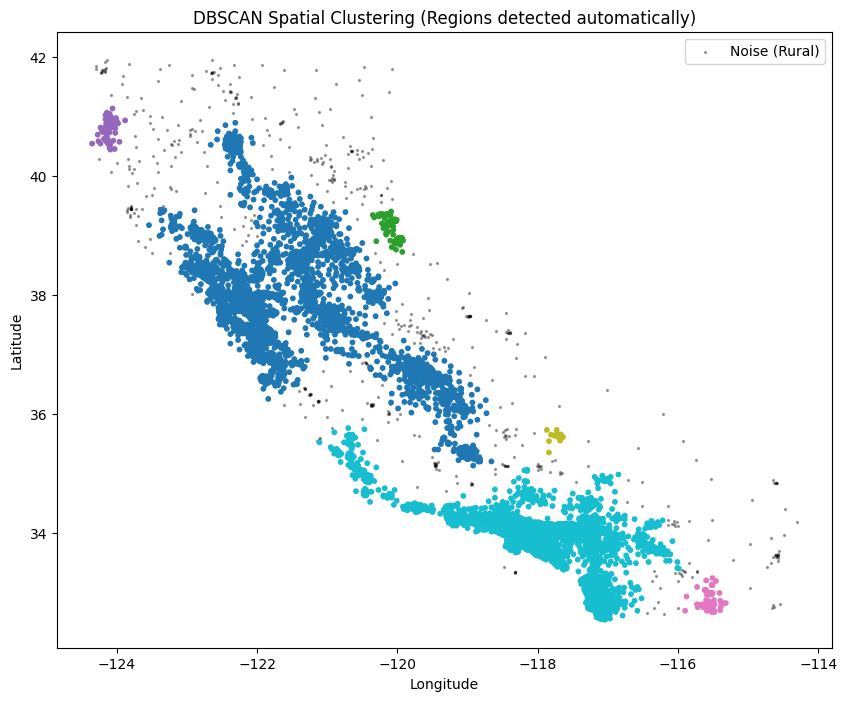

In [13]:
# 2. Run DBSCAN
# eps=0.3 degrees, min_samples=20 (needs 20 districts to form a cluster)
db_geo = DBSCAN(eps=0.2, min_samples=20)
y_geo = db_geo.fit_predict(X_loc)

# 3. Visualize Clusters
plt.figure(figsize=(10, 8))

# Plot Noise (Outliers/Rural) in Black
plt.scatter(X_loc.loc[y_geo == -1, 'Longitude'], X_loc.loc[y_geo == -1, 'Latitude'], 
            s=2, color='black', alpha=0.3, label='Noise (Rural)')

# Plot Clusters (Cities/Regions) in Colors
plt.scatter(X_loc.loc[y_geo != -1, 'Longitude'], X_loc.loc[y_geo != -1, 'Latitude'], 
            s=10, c=y_geo[y_geo != -1], cmap='tab10', marker='o')

plt.title("DBSCAN Spatial Clustering (Regions detected automatically)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

### Conclusion
- **The Colors:** DBSCAN effectively found the **Bay Area** (San Francisco) as purple, **Los Angeles** as cyan, **San Diego** as pink, and the **Central Valley** as blue as distinct clusters.
- Green / yellow micro-clusters
Likely Sacramento / foothill cities / Bakersfield-adjacent pockets
These appear because eps is now small enough to stop weak density bridges.
- **The Black Dots:** It correctly identified the scattered districts in the mountains and deserts as **Noise** (Rural areas).

Try doing *that* with K-Means (it would force the rural areas into the nearest city!).